In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

# 統計モデルを推定するライブラリ
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

# グラフの日本語表記
from matplotlib import rcParams

rcParams["font.family"] = "IPAexGothic"
rcParams["font.sans-serif"] = "Meiryo"

In [2]:
# 表示設定
np.set_printoptions(linewidth=60)
pd.set_option("display.width", 80)

from matplotlib.pylab import rcParams

rcParams["figure.figsize"] = 8, 4

In [3]:
# =====================================================
# ランダムウォーク系列（Random Walk）の生成
# =====================================================

# 乱数の種を固定（再現性のため）
np.random.seed(1)

# 正規分布 N(0,1) に従う乱数を100個生成
# loc=平均0, scale=標準偏差1, size=サンプル数
sim_size = 100

# 乱数を累積和してランダムウォーク系列を作成
# ランダムウォークとは：前時点の値にランダムな変化量（誤差）を加えて進む過程
rw = np.cumsum(stats.norm.rvs(loc=0, scale=1, size=sim_size))

In [4]:
# =====================================================
# 季節ランダムウォーク（Seasonal Random Walk）の生成
# =====================================================

# 乱数の種を固定（再現性の確保）
np.random.seed(1)

# シミュレーションの長さ（観測数）
srw = np.zeros(sim_size)

# 最初の4時点（初期値）に正規乱数を代入
# loc=平均0, scale=標準偏差1 の正規分布に従う乱数
np.put(srw, [0, 1, 2, 3], stats.norm.rvs(loc=0, scale=1, size=4))

# 5時点目以降のデータを生成
# 4期前の値にノイズを加えて生成することで、「周期4のランダムウォーク」となる
for i in range(4, sim_size):
    np.put(srw, i, srw[i - 4] + stats.norm.rvs(loc=0, scale=1, size=1))

array([<Axes: >, <Axes: >], dtype=object)

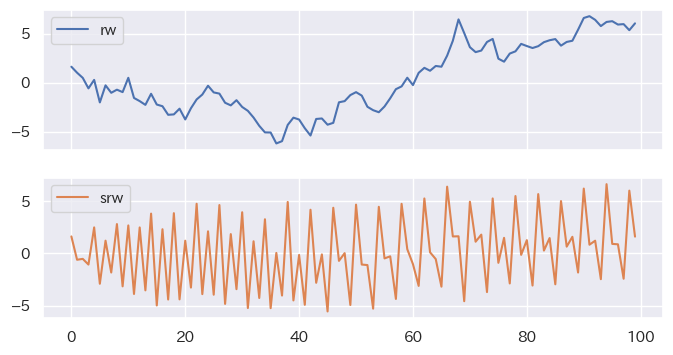

In [5]:
# DataFrameにまとめる
rw_df = pd.DataFrame({"rw": rw, "srw": srw})

# 可視化
rw_df.plot(subplots=True)

array([<Axes: >, <Axes: >], dtype=object)

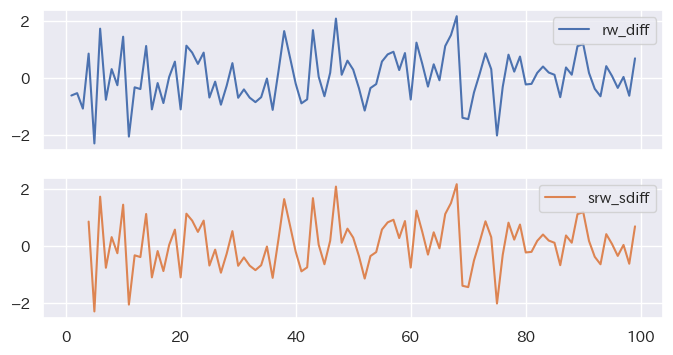

In [6]:
# =====================================================
# ランダムウォークと季節ランダムウォークの差分系列の比較
# =====================================================

# ランダムウォーク過程の1階差分系列を作成
# 差分をとることで、非定常なランダムウォークが「白色ノイズ系列」に近づく
rw_df["rw_diff"] = rw_df.diff(1).rw

# 季節ランダムウォーク過程の季節差分系列を作成
# 4期前との差分（季節差分）を取ることで、季節的ランダムウォークが定常化する
rw_df["srw_sdiff"] = rw_df.diff(4).srw

# =====================================================
# グラフ描画：差分系列の可視化
# =====================================================
rw_df[["rw_diff", "srw_sdiff"]].plot(subplots=True)

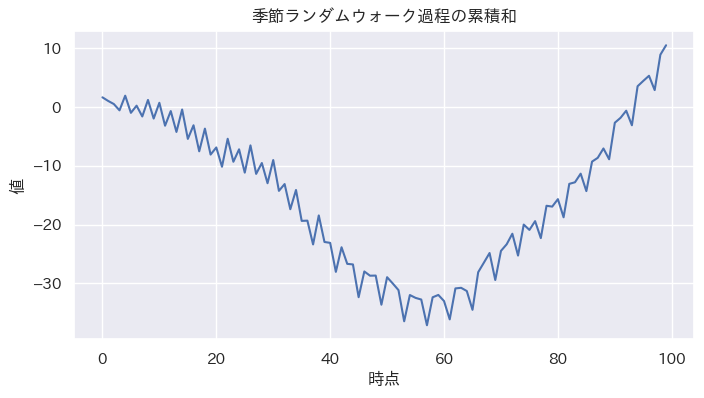

In [7]:
# =====================================================
# 季節ランダムウォーク過程の累積和の可視化
# =====================================================

# 季節ランダムウォーク系列（srw）に対して、さらに累積和をとる
# → ランダムウォークの「2重累積和」に相当し、
#    非定常性がさらに強くなる（トレンドがより顕著になる）
strw = rw_df["srw"].cumsum()

# グラフ描画
plt.plot(strw)
plt.title("季節ランダムウォーク過程の累積和")
plt.xlabel("時点")
plt.ylabel("値")
plt.grid(True)